In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/breast_cancer_dataset.csv")
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


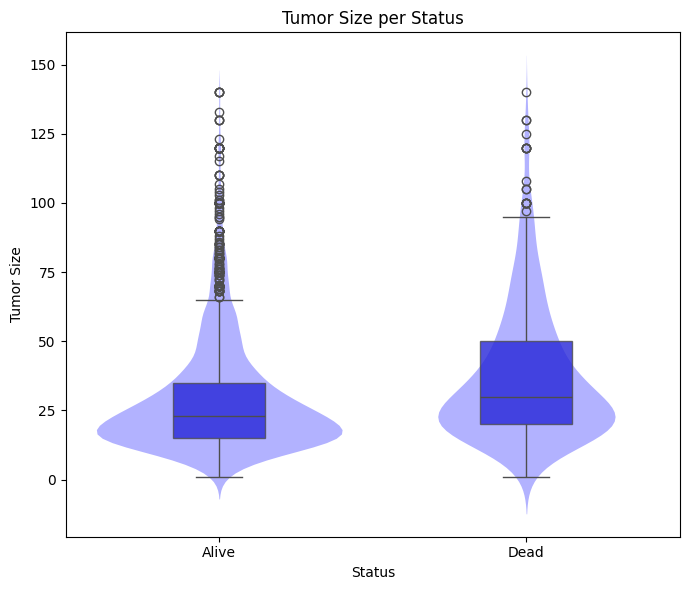

In [ ]:
#confronto tra grandezza del tumore e stato finale

col_x = "Status"
col_y = "Tumor Size"
color = 'blue'

plt.figure(figsize=(7, 6))

# VIOLIN
vp = sns.violinplot(
    data=df, x=col_x, y=col_y,
    color=color,
    inner=None, linewidth=0, saturation=1
)

# Ridurre l’opacità delle violin
for patch in vp.collections:
    patch.set_alpha(0.3)

# BOX PLOT
bp = sns.boxplot(
    data=df, x=col_x, y=col_y,
    color=color,
    width=0.3,
    boxprops={'zorder': 2},
    saturation=0.7
)

# Opacità del boxplot
for patch in bp.patches:
    patch.set_alpha(0.8)

plt.xlabel("Status")
plt.ylabel("Tumor Size")
plt.title("Tumor Size per Status")

plt.tight_layout()
plt.show()



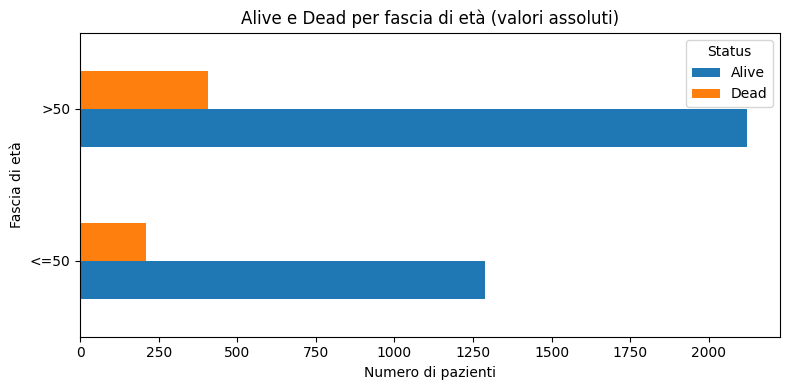

In [14]:
#confronto tra età e stato finale



# Creiamo la colonna per la fascia di età
df["AgeGroup"] = df["Age"].apply(lambda x: ">50" if x > 50 else "<=50")

# Calcolo dei conteggi assoluti
counts = (
    df.groupby("AgeGroup")["Status"]
      .value_counts()
      .rename("Count")
      .reset_index()
)

# Pivot per ottenere colonne separate per Alive/Dead
plot_df = counts.pivot(index="AgeGroup", columns="Status", values="Count")

# Ordinare fasce età
plot_df = plot_df.loc[["<=50", ">50"]]

# Grafico a barre orizzontali
plot_df.plot(kind="barh", stacked=False, figsize=(8, 4))

plt.xlabel("Numero di pazienti")
plt.ylabel("Fascia di età")
plt.title("Alive e Dead per fascia di età (valori assoluti)")
plt.legend(title="Status")

plt.tight_layout()
plt.show()


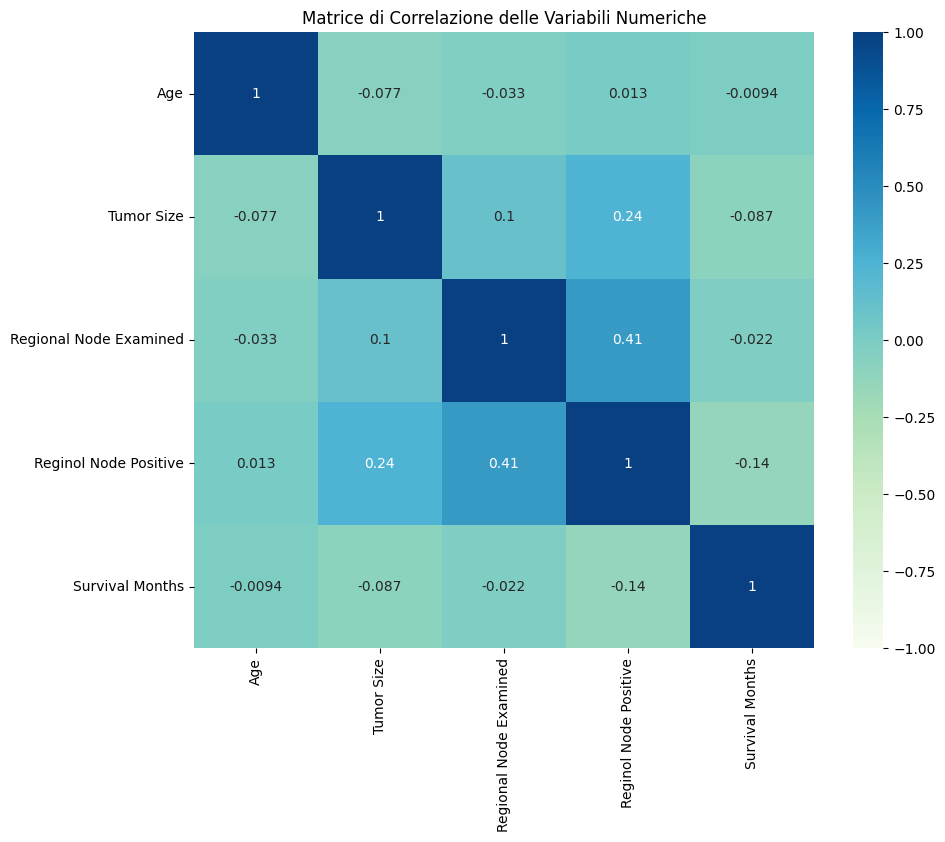

In [15]:
num_cols = [
    "Age",
    "Tumor Size",
    "Regional Node Examined",
    "Reginol Node Positive",
    "Survival Months"
]

plt.figure(figsize=(10,8))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    cmap="GnBu",
    vmin = -1,
    vmax = 1
)

plt.title("Matrice di Correlazione delle Variabili Numeriche")
plt.show()